## 2 Ridge Regression
### Student ID: 35224436 | Full name: Yiming Zhang

## Task I.  SGD Weight Update Derivation

#### 1. Regularized Error Function Definition

$$
E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^{N}(y_n - \mathbf{w}^T\mathbf{x}_n)^2 + \frac{\lambda}{2}\|\mathbf{w}\|^2
$$

Where:
- $\mathbf{w} \in \mathbb{R}^D$ is the weight vector
- $\mathbf{x}_n \in \mathbb{R}^D$ is the $n$-th input feature vector
- $y_n \in \mathbb{R}$ is the $n$-th target value
- $\lambda > 0$ is the regularization parameter
- $\|\mathbf{w}\|^2 = \mathbf{w}^T\mathbf{w} = \sum_{j=1}^{D}w_j^2$ is the squared L2 norm

#### 2. Gradient Computation

To use gradient descent, we need to compute the gradient of the error function with respect to the weight vector $\mathbf{w}$:

$$
\nabla_{\mathbf{w}} E(\mathbf{w}) = \frac{\partial E(\mathbf{w})}{\partial \mathbf{w}}
$$

Computing the gradients of the error term and regularization term separately:

**Gradient of the error term:**
$$
\frac{\partial}{\partial \mathbf{w}} \left[\frac{1}{2}\sum_{n=1}^{N}(y_n - \mathbf{w}^T\mathbf{x}_n)^2\right] = -\sum_{n=1}^{N}(y_n - \mathbf{w}^T\mathbf{x}_n)\mathbf{x}_n
$$

**Gradient of the regularization term:**
$$
\frac{\partial}{\partial \mathbf{w}} \left[\frac{\lambda}{2}\|\mathbf{w}\|^2\right] = \frac{\lambda}{2} \cdot 2\mathbf{w} = \lambda\mathbf{w}
$$

**Total gradient:**
$$
\nabla_{\mathbf{w}} E(\mathbf{w}) = -\sum_{n=1}^{N}(y_n - \mathbf{w}^T\mathbf{x}_n)\mathbf{x}_n + \lambda\mathbf{w}
$$

#### 3. SGD Update

In stochastic gradient descent, we use only one sample $(x_n, y_n)$ at a time to update the weights. For a single sample, the error function is:

$$
E_n(\mathbf{w}) = \frac{1}{2}(y_n - \mathbf{w}^T\mathbf{x}_n)^2 + \frac{\lambda}{2}\|\mathbf{w}\|^2
$$

The gradient for a single sample is:

$$
\nabla_{\mathbf{w}} E_n(\mathbf{w}) = -(y_n - \mathbf{w}^T\mathbf{x}_n)\mathbf{x}_n + \lambda\mathbf{w}
$$

**SGD weight update rule:**

$$
\mathbf{w}^{(t)} = \mathbf{w}^{(t-1)} - \eta \nabla_{\mathbf{w}} E_n(\mathbf{w}^{(t-1)})
$$

$$
\mathbf{w}^{(t)} = \mathbf{w}^{(t-1)} - \eta[-(y_n - \mathbf{w}^{(t-1)T}\mathbf{x}_n)\mathbf{x}_n + \lambda\mathbf{w}^{(t-1)}]
$$

$$
\mathbf{w}^{(t)} = \mathbf{w}^{(t-1)} + \eta(y_n - \mathbf{w}^{(t-1)T}\mathbf{x}_n)\mathbf{x}_n - \eta\lambda\mathbf{w}^{(t-1)}
$$

$$
\mathbf{w}^{(t)} = \mathbf{w}^{(t-1)}(1 - \eta\lambda) + \eta(y_n - \mathbf{w}^{(t-1)T}\mathbf{x}_n)\mathbf{x}_n
$$

Where:
- $\eta > 0$ is the learning rate
- $t$ is the iteration number
- $(x_n, y_n)$ is the current training sample

#### 4. Matrix/Vector Representation

The above update rule can be written in matrix form as:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)}(1 - \eta\lambda) + \eta\mathbf{x}_n(y_n - \mathbf{x}_n^T\mathbf{w}^{(t)})
$$


## Task II. SGD Implementation

In [83]:
import numpy as np

class SGDLinearRegressor:
    def __init__(self, batch_size=1, eta=0.01, tau_max=1000, epsilon=0.00001, random_state=None, lam=1):
        self.eta = eta
        self.tau_max = tau_max
        self.epsilon = epsilon
        self.random_state = random_state
        self.batch_size = batch_size
        self.lam = lam

    def fit(self, x, y):
        RNG = np.random.default_rng(self.random_state)
        x = np.asarray(x, dtype=float)
        y = np.asarray(y, dtype=float)
        
        # Ensure y is 1D
        if y.ndim > 1:
            y = y.flatten()
        
        n, p = x.shape
        print(f"Training data shape: x={x.shape}, y={y.shape}, features={p}")

        self.w_ = np.zeros(shape=(self.tau_max + 1, p))
        w_prev = self.w_[0].copy()  # Make a copy to avoid reference issues

        for tau in range(1, self.tau_max + 1):
            idx = RNG.choice(n, size=self.batch_size, replace=True)
            Xb, yb = x[idx], y[idx]

            # Compute predictions and residuals
            pred = Xb.dot(w_prev)  # Shape: (batch_size,)
            resid = pred - yb      # Shape: (batch_size,)
            
            # Compute gradients
            grad_data = Xb.T.dot(resid) / self.batch_size  # Shape: (p,)
            grad_reg = self.lam * w_prev                   # Shape: (p,)
            grad = grad_data + grad_reg                    # Shape: (p,)
            
            # Update weights
            w_new = w_prev - self.eta * grad  # Shape: (p,)
            
            # Debug: Print shapes for first iteration
            if tau == 1:
                print(f"Debug shapes:")
                print(f"  Xb: {Xb.shape}, yb: {yb.shape}")
                print(f"  pred: {pred.shape}, resid: {resid.shape}")
                print(f"  grad_data: {grad_data.shape}, grad_reg: {grad_reg.shape}")
                print(f"  grad: {grad.shape}, w_new: {w_new.shape}")
                print(f"  w_[tau]: {self.w_[tau].shape}")

            self.w_[tau] = w_new
            
            # Check convergence
            if np.linalg.norm(w_new - w_prev) < self.epsilon:
                print(f"Converged at iteration {tau}")
                break
                
            w_prev = w_new.copy()  # Make a copy for next iteration

        self.coef_ = self.w_[tau]
        self.w_ = self.w_[:tau + 1]
        return self

    def predict(self, x):
        x = np.asarray(x, dtype=float)
        return x.dot(self.coef_)


In [ ]:
import numpy as np

class SGDLinearRegressor:
    def __init__(self, batch_size=1, eta=0.01, tau_max=1000, epsilon=0.00001, random_state=None, lam=1):
        self.eta = eta
        self.tau_max = tau_max
        self.epsilon = epsilon
        self.random_state = random_state
        self.batch_size = batch_size
        self.lam = lam

    def fit(self, x, y):
        RNG = np.random.default_rng(self.random_state)
        x = np.asarray(x, dtype=float)
        y = np.asarray(y, dtype=float)
        if y.ndim > 1:
            y = y.flatten()
        n, p = x.shape

        self.w_ = np.zeros(shape=(self.tau_max + 1, p))
        w_prev = self.w_[0]

        for tau in range(1, self.tau_max + 1):
            idx = RNG.choice(n, size=self.batch_size, replace=True)
            Xb, yb = x[idx], y[idx]

            resid = Xb.dot(w_prev) - yb      # residual
            grad_data = Xb.T.dot(resid) / self.batch_size
            grad = grad_data + self.lam * w_prev

            w_new = w_prev - self.eta * grad

            self.w_[tau] = w_new
            if np.linalg.norm(w_new - w_prev) < self.epsilon:
                break
            w_prev = w_new

        self.coef_ = self.w_[tau]
        self.w_ = self.w_[:tau + 1]
        return self

    def predict(self, x):
        x = np.asarray(x, dtype=float)
        return x.dot(self.coef_)


## Task III: L2 Regularization Effect Analysis

### Step 1: Synthetic data construction

Dataset is generated according to the following specifications.

- $X \sim \text{Uniform}(-0.6, 0.6)$
- $Y = \frac{\sin(2\pi x)}{2 + 3x} + \epsilon$
- $\epsilon \sim N(0, 0.1)$



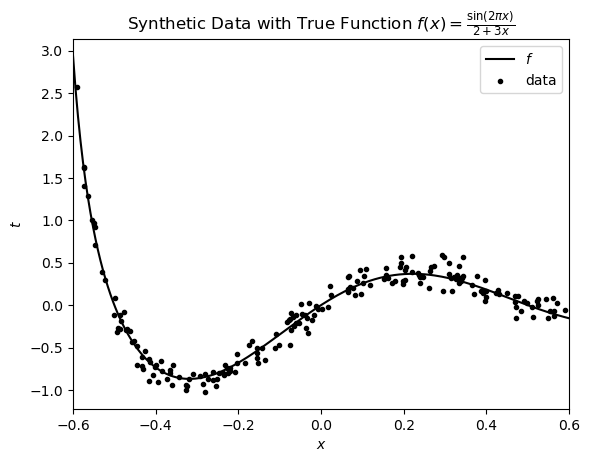

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# true function
def f(x):
    x = np.asarray(x)
    return np.sin(2*np.pi*x)/(2+3*x)

# generation function
def make_additive_noise_data(n, f, a, b, noise=0.1, random_state=None):
    RNG = np.random.default_rng(random_state)
    x = RNG.uniform(a, b, size=(n, 1))
    y = f(x) + RNG.normal(0, noise, size=(n, 1))
    return x, y

# Visualization function following Activity 2.3 style  
def plot_function(f, a, b, models=[], data=None, ax=None, ax_labels=True, legend=True):
    ax = plt.gca() if ax is None else ax
    xx = np.linspace(a, b, 200).reshape(-1, 1)
    if len(models)==1:
        ax.fill_between(xx.squeeze(), f(xx).squeeze(), models[0].predict(xx).squeeze(), alpha=0.3)
        ax.plot(xx, models[0].predict(xx), label='$y$')
    if len(models) > 1:
        for model in models: ax.plot(xx, model.predict(xx), color='gray', alpha=0.5)
    ax.plot(xx, f(xx), color='black', label='$f$')
    if data is not None:
        x, y = data
        ax.scatter(x, y, marker='.', color='black', label='data')
    if ax_labels:
        ax.set_xlabel('$x$')
        ax.set_ylabel('$t$')
    if legend: ax.legend()
    ax.margins(x=0)

# Visualize the data and true function
plot_function(f, -0.6, 0.6, data=make_additive_noise_data(200, f, -0.6, 0.6, random_state=42))
plt.title('Synthetic Data with True Function $f(x) = \\frac{\\sin(2\\pi x)}{2+3x}$')
plt.show()


### Step 2: Ridge Regression Training and Regularization Analysis
In this step, we train ridge regression models with different regularization parameters (λ) and analyze their effects on model performance and weight norms.

In [86]:
from sklearn.metrics import mean_squared_error


class PolynomialFeatures:

    def __init__(self, degree):
        self.degree = degree

    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):
        output = []
        for i in range(0, self.degree + 1):
            output.append(x**i)
        return np.column_stack(output)

    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x, y)


poly_features = PolynomialFeatures(degree=4)
# generate lambda values: 10^(-10+9i/100) for i = 0 to 100
lambda_values = np.geomspace(10 ** (-10), 0.1, 101, endpoint=True)
print(f"Lambda range: {lambda_values[0]:.2e} to {lambda_values[-1]:.2e}")
print(f"Number of lambda values: {len(lambda_values)}")

# set the number of training repeats
n_repeats = 15

# variables to store the results of all repeats
all_train_errors = []
all_test_errors = []

# generate the test data
X_test, y_test = make_additive_noise_data(5000, f, -0.6, 0.6, random_state=818)
X_test_poly = poly_features.transform(X_test)

print("\nTraining starts...")

for repeat in range(n_repeats):
    # generate the training data
    X_train, y_train = make_additive_noise_data(
        20, f, -0.6, 0.6, random_state=818 + repeat
    )
    # transform the training and test data
    X_train_poly = poly_features.transform(X_train)
    # variables to store the results for each repeat
    train_errors = []
    test_errors = []

    for i, lam in enumerate(lambda_values):
        # create and train the ridge regression model
        model = SGDLinearRegressor(
            lam=lam, eta=0.01, tau_max=2000, epsilon=1e-6, random_state=818 - repeat
        )
        # fit the model
        model.fit(X_train_poly, y_train)
        # predict
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        # calculate the error
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        # store the results
        train_errors.append(train_mse)
        test_errors.append(test_mse)

        if i == len(lambda_values) - 1:
            print(
                f"Training {repeat+1}/{n_repeats}, Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}"
            )

    all_train_errors.append(train_errors)
    all_test_errors.append(test_errors)

print("\nTraining completed!")

# calculate the mean and standard deviation of the results
mean_train_errors = np.mean(all_train_errors, axis=0)
mean_test_errors = np.mean(all_test_errors, axis=0)

Lambda range: 1.00e-10 to 1.00e-01
Number of lambda values: 101

Training starts...
Training 1/15, Train MSE = 0.2384, Test MSE = 0.3424
Training 2/15, Train MSE = 0.1376, Test MSE = 0.3384
Training 3/15, Train MSE = 0.4417, Test MSE = 0.3304
Training 4/15, Train MSE = 0.1627, Test MSE = 0.3407
Training 5/15, Train MSE = 0.1687, Test MSE = 0.3371
Training 6/15, Train MSE = 0.4234, Test MSE = 0.3723
Training 7/15, Train MSE = 0.3907, Test MSE = 0.3339
Training 8/15, Train MSE = 0.2901, Test MSE = 0.3338
Training 9/15, Train MSE = 0.4671, Test MSE = 0.4609
Training 10/15, Train MSE = 0.1156, Test MSE = 0.3759
Training 11/15, Train MSE = 0.7448, Test MSE = 0.3221
Training 12/15, Train MSE = 0.0748, Test MSE = 0.3708
Training 13/15, Train MSE = 0.2040, Test MSE = 0.3538
Training 14/15, Train MSE = 0.3894, Test MSE = 0.3681
Training 15/15, Train MSE = 0.1439, Test MSE = 0.3716

Training completed!


### Step 3: Results Visualization
Plotting the results to illustrate the effect of different λ values on model performance.

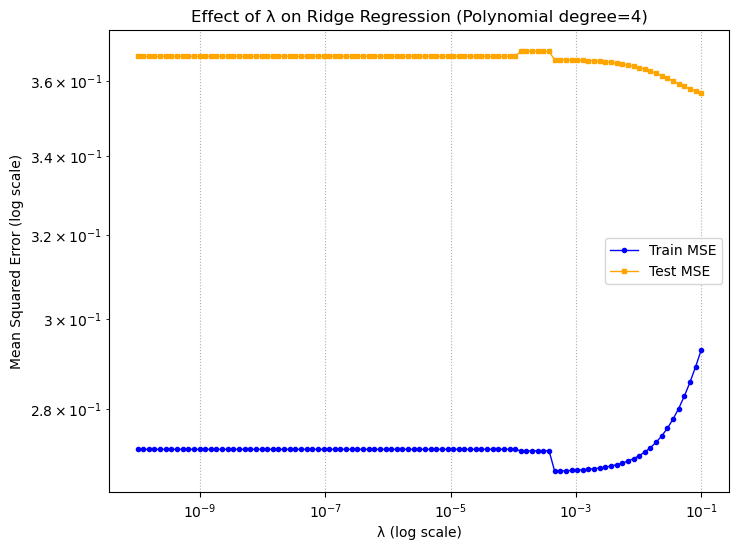

In [87]:
import matplotlib.pyplot as plt

# ===== Plot: MSE vs lambda =====
plt.figure(figsize=(8, 6))

plt.plot(
    lambda_values,
    mean_train_errors,
    label="Train MSE",
    color="blue",
    marker="o",
    markersize=3,
    linewidth=1,
)


plt.plot(
    lambda_values,
    mean_test_errors,
    label="Test MSE",
    color="orange",
    marker="s",
    markersize=3,
    linewidth=1,
)


plt.xscale("log")
plt.yscale("log")

plt.xlabel("λ (log scale)")
plt.ylabel("Mean Squared Error (log scale)")
plt.title("Effect of λ on Ridge Regression (Polynomial degree=4)")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()

### Step 4: Analysis
blabla~ TODO